In [17]:
import pandas as pd
import yfinance as yf
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import find_peaks
from scipy.signal import argrelextrema

### Finding peaks and troughts

[*********************100%%**********************]  1 of 1 completed


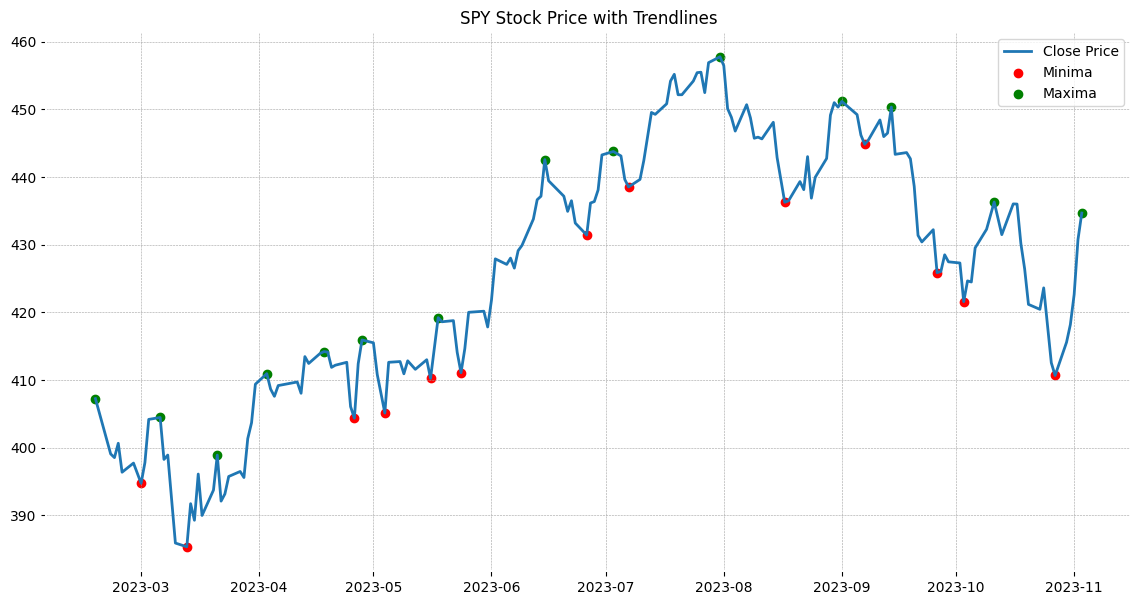

In [35]:
# Fetch historical data from Yahoo Finance
symbol = 'SPY'
data = yf.download(symbol, period='180d', interval='1d')

# Define the window size for local extrema
window = 4 # Number of periods

# Find local maxima and minima
data['min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal,
                                      order=window)[0]]['Close']
data['max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal,
                                      order=window)[0]]['Close']

# Function to draw trendlines
def draw_trendlines(extrema, ax):
    # Sort the extrema points based on index (date)
    sorted_extrema = extrema.dropna().sort_index()
    
    # Iterate over the sorted extrema to draw lines
    for i in range(1, len(sorted_extrema)):
        # Draw a line from the previous extremum to the current one
        ax.plot([sorted_extrema.index[i-1], sorted_extrema.index[i]], 
                [sorted_extrema.values[i-1], sorted_extrema.values[i]], 'r--')

# Plot the closing prices and the extrema
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(data['Close'], label='Close Price')
ax.scatter(data.index, data['min'], c='r', label='Minima')
ax.scatter(data.index, data['max'], c='g', label='Maxima')

# Draw trendlines
# draw_trendlines(data['min'], ax)
# draw_trendlines(data['max'], ax)

plt.title(f'{symbol} Stock Price with Trendlines')
plt.legend()
plt.show()

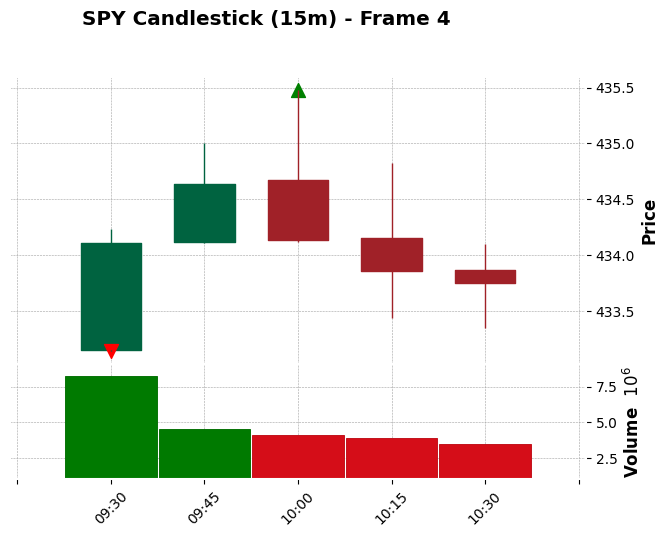

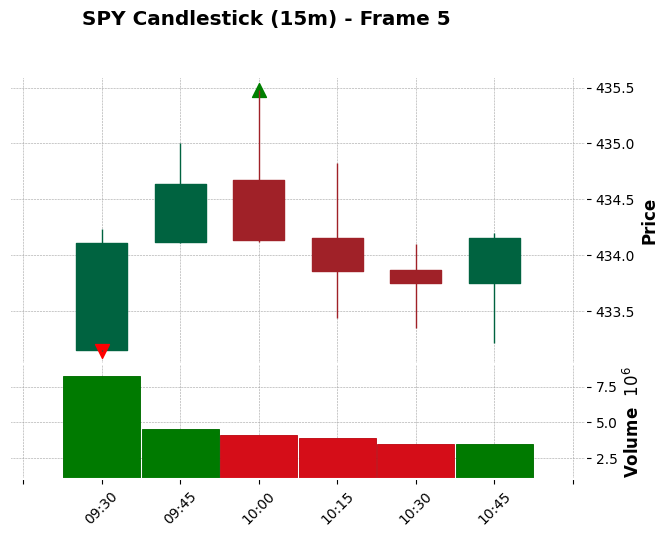

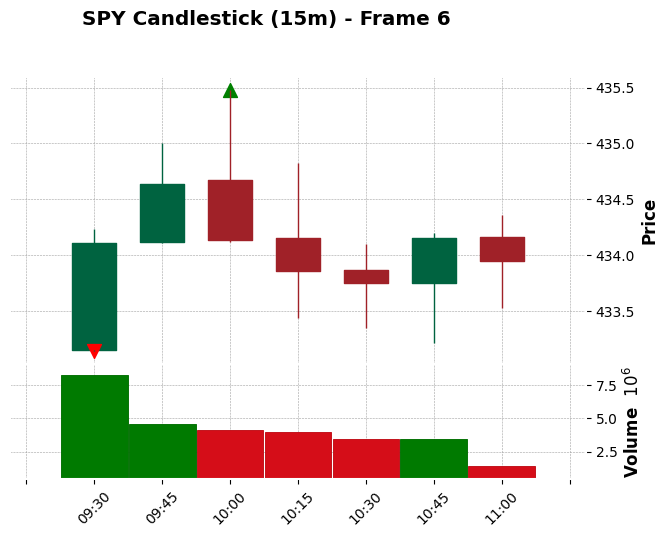

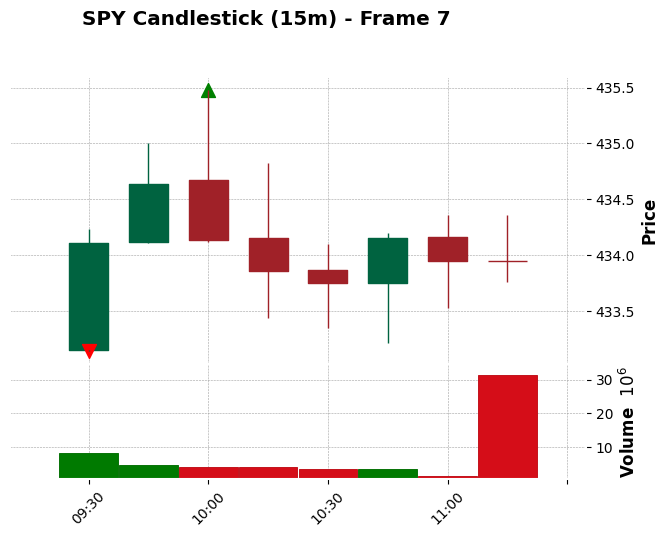

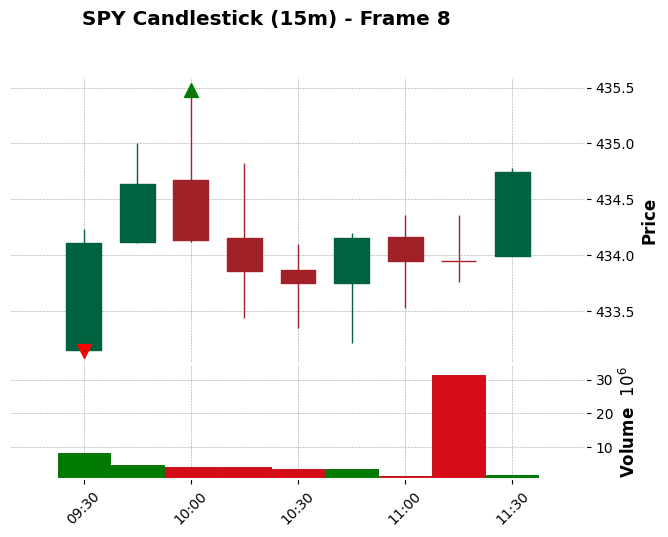

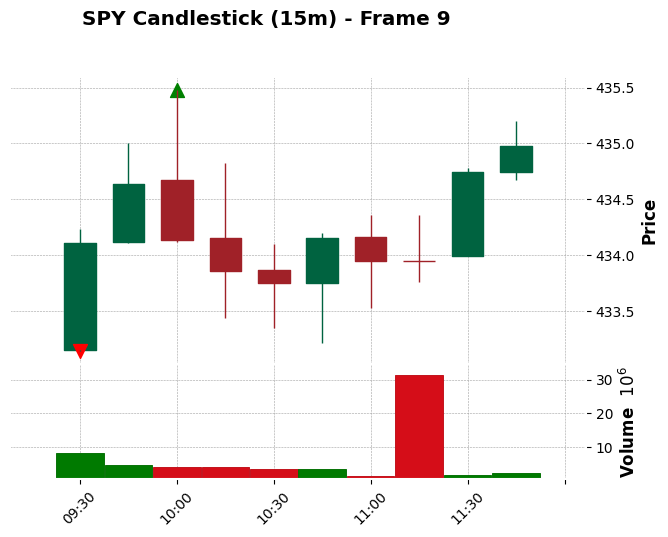

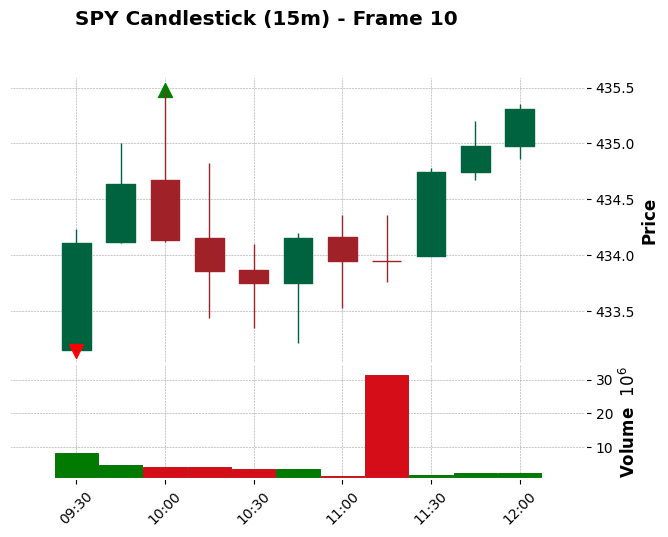

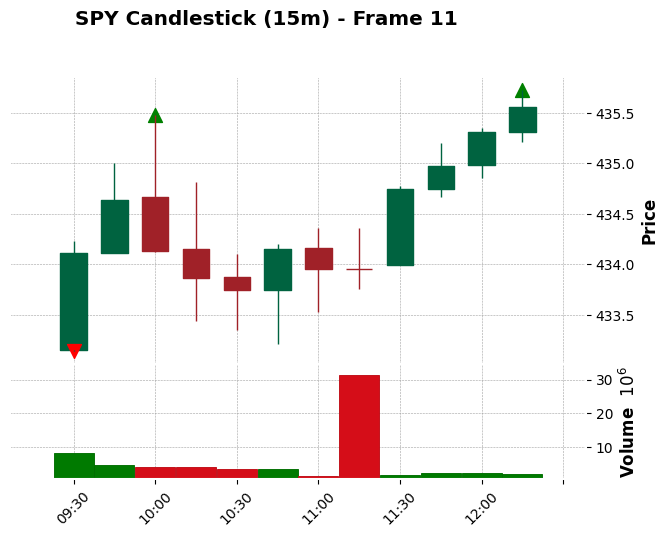

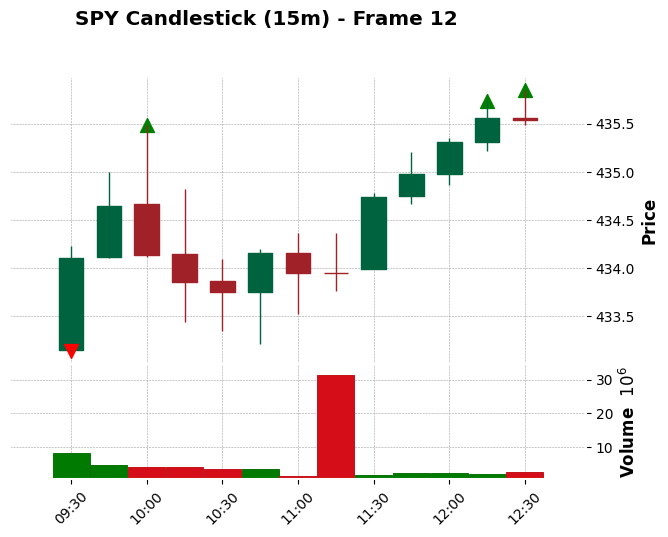

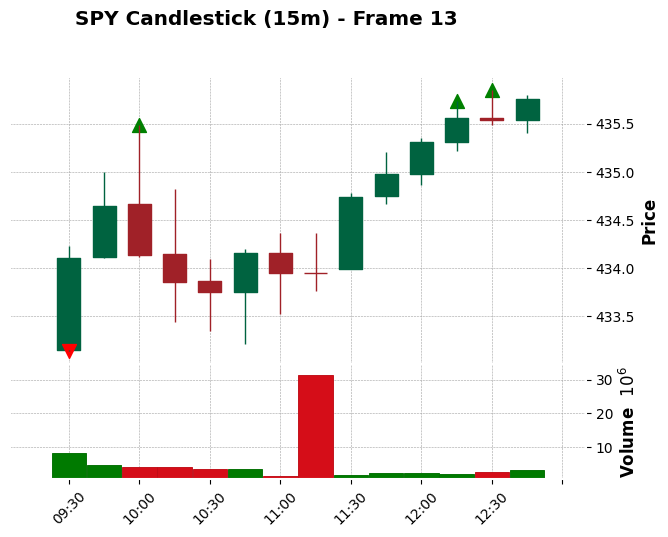

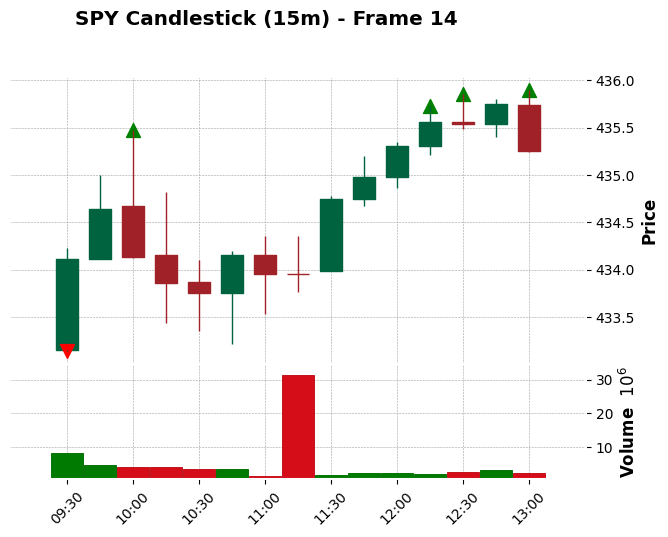

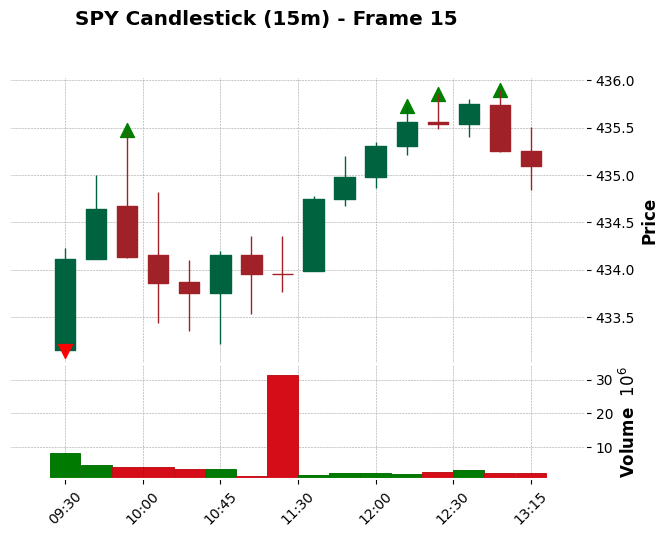

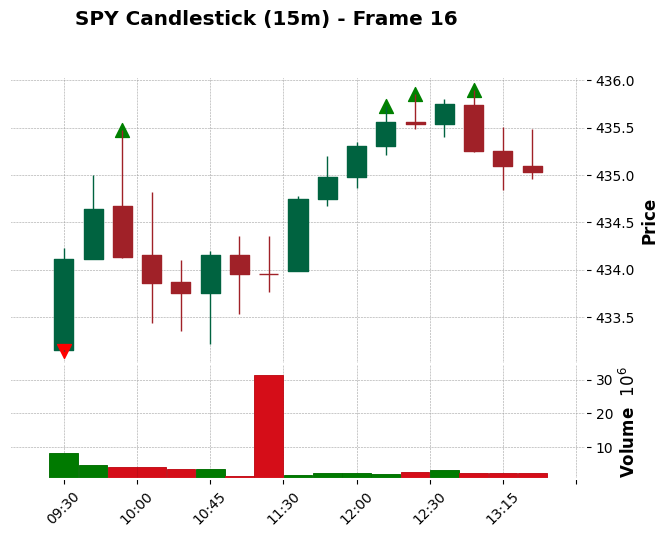

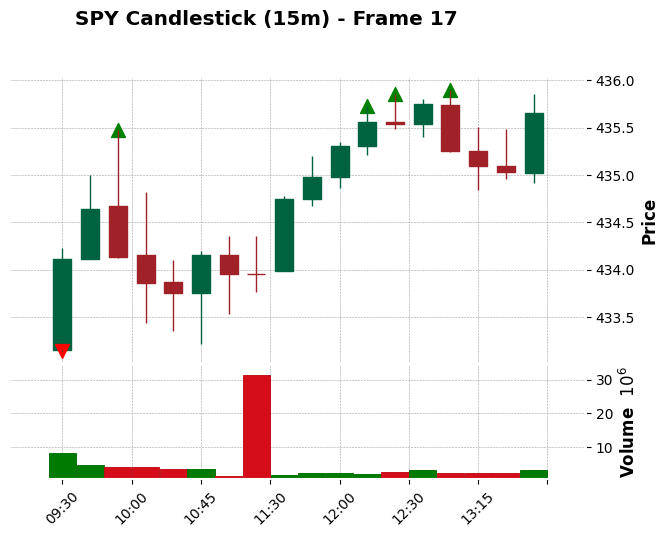

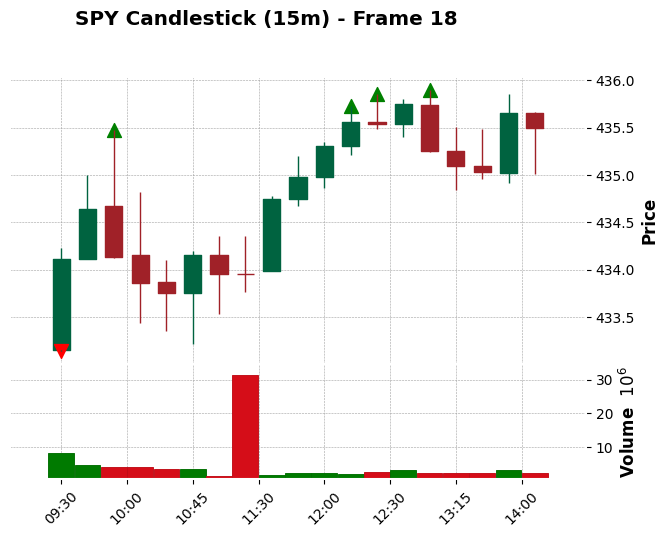

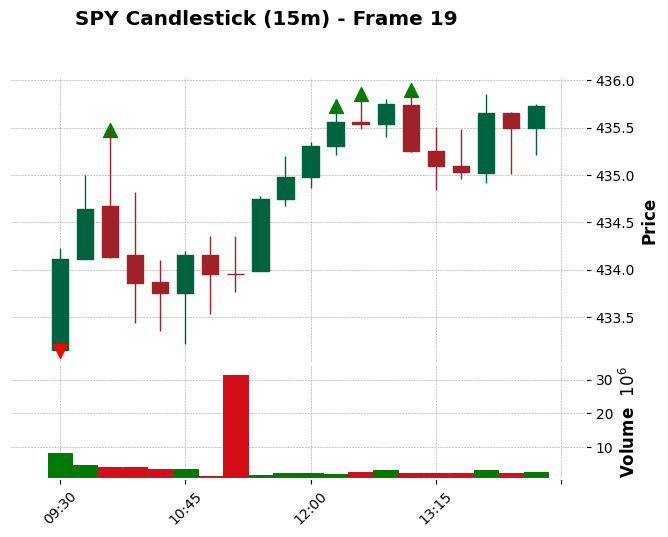

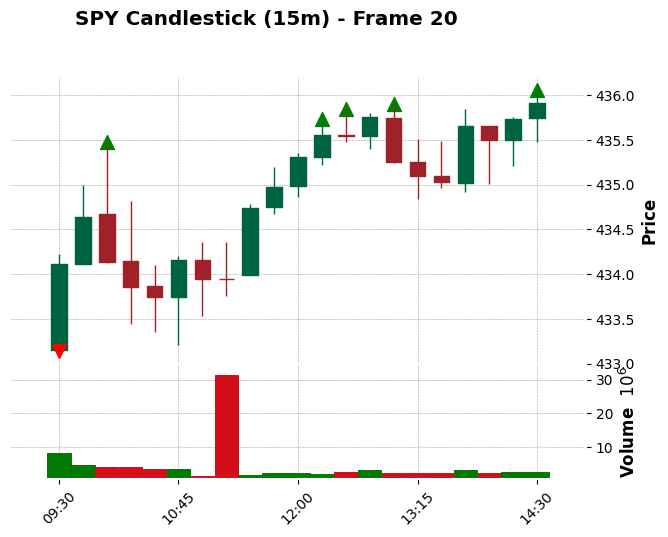

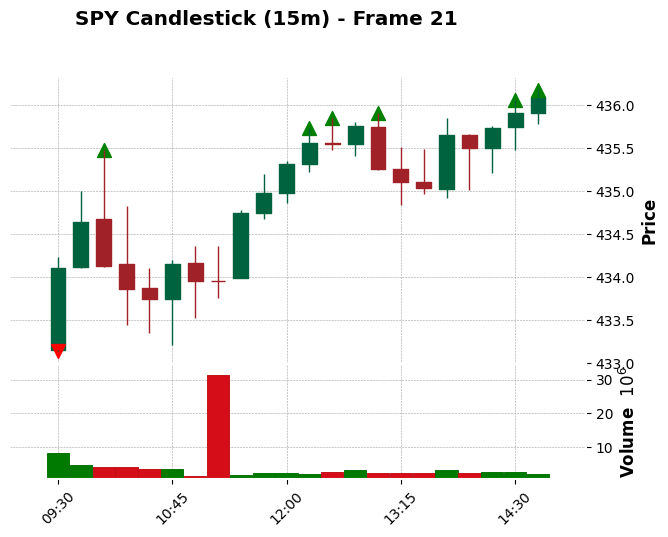

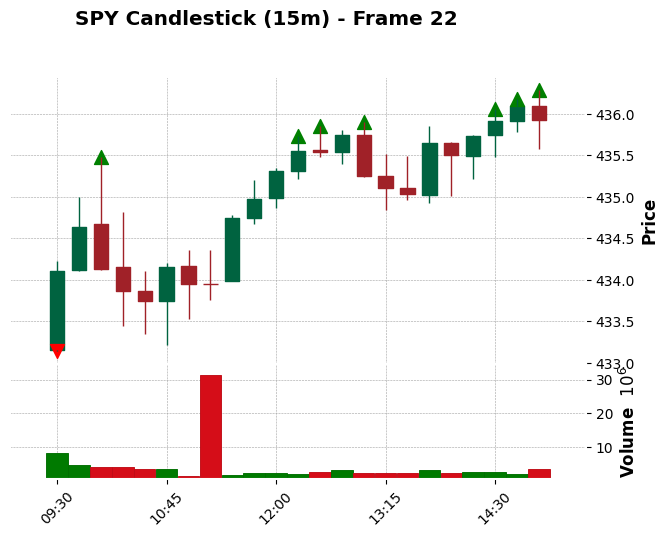

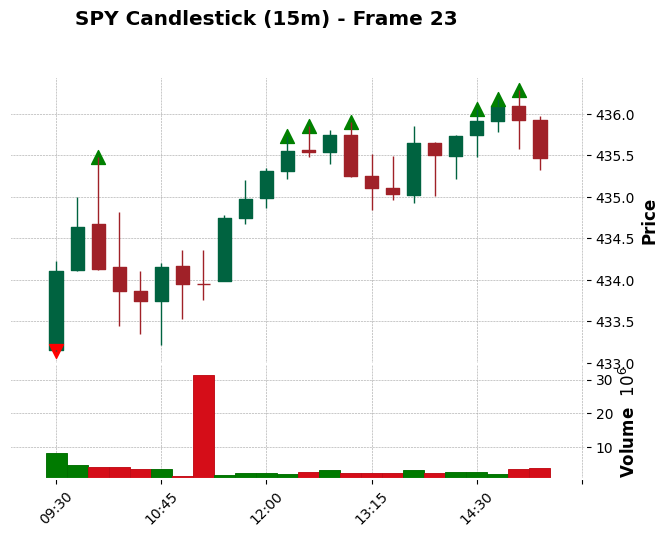

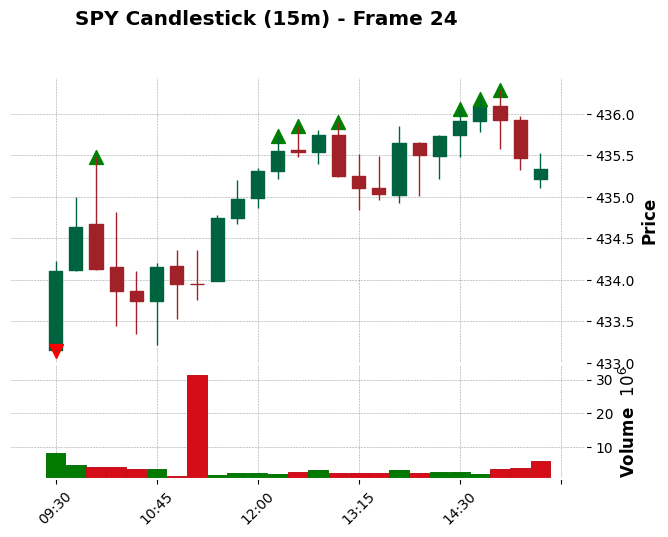

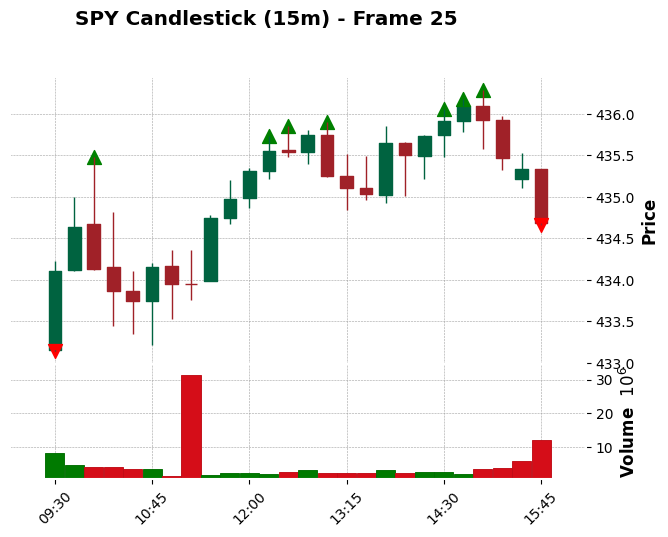

In [34]:
# Define the window size for local extrema
start = 4  # Number of periods (15-minute intervals in this case)

# Initialize maxima and minima columns
data['Max'] = np.nan
data['Min'] = np.nan

# Function to update maxima and minima
def update_extrema(data, window):
    maxima_indices = argrelextrema(data['High'].values, np.greater_equal, order=window)[0]
    minima_indices = argrelextrema(data['Low'].values, np.less_equal, order=window)[0]
    
    # Use .loc to avoid SettingWithCopyWarning
    for index in maxima_indices:
        data.loc[data.index[index], 'Max'] = data['High'].iloc[index]
    for index in minima_indices:
        data.loc[data.index[index], 'Min'] = data['Low'].iloc[index]
    
    return data

# Plot each frame
for i in range(start, len(data)):
    # Window size
    window = 15
    if i<15:
        window= i

    # Update the DataFrame with the latest extrema
    current_data = data.iloc[:i+1]
    current_data = update_extrema(current_data, window)
    
    # Create addplots for maxima and minima
    apds = [mpf.make_addplot(current_data['Max'], type='scatter', markersize=100, marker='^', color='g'),
            mpf.make_addplot(current_data['Min'], type='scatter', markersize=100, marker='v', color='r')]
    
    # Plot the current frame
    mpf.plot(current_data, type='candle', style='charles', addplot=apds, volume=True, title=f'{symbol} Candlestick (15m) - Frame {i}')
    plt.show(block=False)
    plt.pause(0.5)  # Pause for half a second
    plt.close()  # Close the plot to move to the next

[*********************100%%**********************]  1 of 1 completed


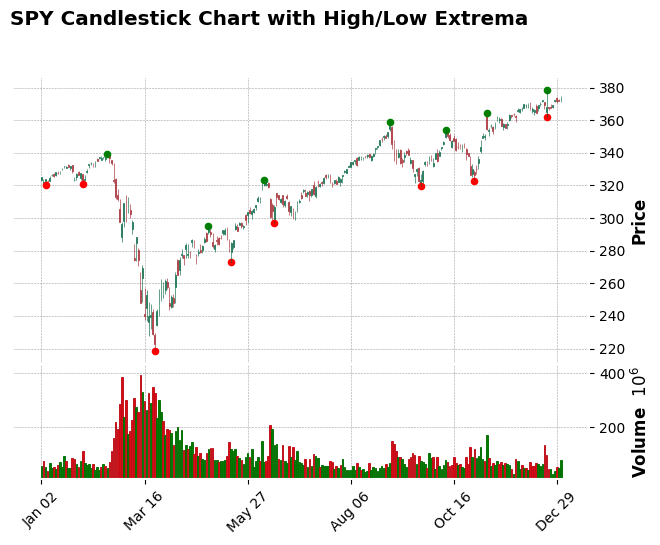

In [59]:
# Define the window size for local extrema
window = 10 # Days

# Find local maxima using the 'High' prices
maxima_indices = argrelextrema(data['High'].values, np.greater_equal, order=window)[0]
data['Max'] = np.nan
data.iloc[maxima_indices, data.columns.get_loc('Max')] = data['High'].iloc[maxima_indices]

# Find local minima using the 'Low' prices
minima_indices = argrelextrema(data['Low'].values, np.less_equal, order=window)[0]
data['Min'] = np.nan
data.iloc[minima_indices, data.columns.get_loc('Min')] = data['Low'].iloc[minima_indices]

# Create a figure and plot the candlestick chart
apds = [mpf.make_addplot(data['Max'], type='scatter', markersize=20, marker='o', color='g'),
        mpf.make_addplot(data['Min'], type='scatter', markersize=20, marker='o', color='r')]

mpf.plot(data, type='candle', style='charles', addplot=apds, volume=True, title=f'{symbol} Candlestick Chart with High/Low Extrema')